In [1]:
%run "Properati_base_setup.py"

Running command `conda list`... ok
pandas=1.0.3 already installed
matplotlib=2.2.2 already installed
bokeh=2.0.0 already installed
seaborn=0.10.0 already installed
ipywidgets=7.5.1 already installed
pytest=5.3.4 already installed
chardet=3.0.4 already installed
plotly=4.6.0 already installed
chart-studio=1.1.0 already installed
nodejs=13.13.0 already installed
psutil=5.7.0 already installed
plotly-orca=1.3.1 already installed
scipy=1.4.1 already installed
statsmodels=0.11.0 already installed


### BORRAR LA SIGUIENTE CELDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import scipy.stats as stats
import matplotlib.pyplot as plt

data = pd.read_csv('properati.csv', sep=',')
data_clean = pd.read_csv('data_clean_EMI.csv', sep=',')

### Gráfico con Data original

In [3]:
grupo0= data[["state_name", "price_usd_per_m2"]].groupby("state_name", sort=False)

maxim0 = (grupo0.price_usd_per_m2.mean() + grupo0.price_usd_per_m2.std())
minim0 = (grupo0.price_usd_per_m2.mean() - grupo0.price_usd_per_m2.std())

media0 = grupo0.price_usd_per_m2.mean()              # Media de cada Provincia

media_s_0 = grupo0.price_usd_per_m2.mean().mean()    # Media por Provincias

cant0 = grupo0.price_usd_per_m2.count()

media_s_0

data_arg0 = pd.concat([minim0, maxim0], axis=1, sort=False, join='inner')
data_arg0.columns = ["0", "1"]

media = media0

ics_data = data_arg0
ics_data.head(3)

,0,1
state_name,,
Capital Federal,-564.099642,6797.960531
Bs.As. G.B.A. Zona Sur,405.849005,2644.864793
Buenos Aires Costa Atlántica,658.423859,2490.842387


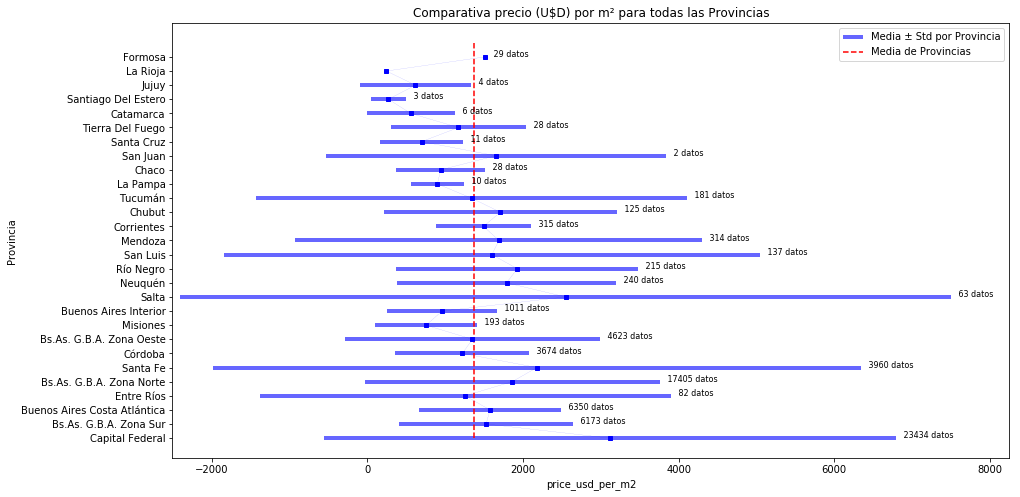

In [4]:
fig = plt.figure(figsize=(15, 8))

y = ics_data.index.values
xmin = ics_data["0"]
xmax = ics_data["1"]

ax = plt.axes(label=y)

ax.hlines(y, xmin, xmax, alpha = 0.6, color = "blue", lw=4, label="Media ± Std por Provincia")

ax.vlines(media_s_0, ics_data.index[0], len(ics_data.index), linestyles="dashed", colors = "red", label="Media de Provincias");

plt.plot(media, y, 'bs--', linewidth=0.1, markersize=4)

for i in range(len(ics_data.index)):
    if not np.isnan(xmax[i]):     # porque xmax[26] es NaN
        ax.text(xmax[i], i, "   "+str(cant0.iloc[i])+" datos", fontsize=8) 

ax.set_xlim(left=((min(xmin))-100), right=(max(xmax)*1.1))

ax.set_ylabel('Provincia')
ax.set_xlabel('price_usd_per_m2')
ax.set_title('Comparativa precio (U$D) por m² para todas las Provincias')
ax.legend()

### Gráfico con Data_Clean

In [5]:
grupo1= data_clean.groupby("state_name", sort=False)

maxim1 = (grupo1.price_usd_per_m2.mean() + grupo1.price_usd_per_m2.std())
minim1 = (grupo1.price_usd_per_m2.mean() - grupo1.price_usd_per_m2.std())

media1 = grupo1.price_usd_per_m2.mean()

media_s_1 = grupo1.price_usd_per_m2.mean().mean()

cant1 = grupo1.price_usd_per_m2.count()

data_arg1 = pd.concat([minim1, maxim1], axis=1, sort=False, join='inner')
data_arg1.columns = ["0", "1"]

media = media1

ics_data = data_arg1
ics_data.head(3)

,0,1
state_name,,
Capital Federal,1601.547111,3249.609781
Bs.As. G.B.A. Zona Sur,834.963633,2139.182002
Buenos Aires Costa Atlántica,845.216684,2325.358986


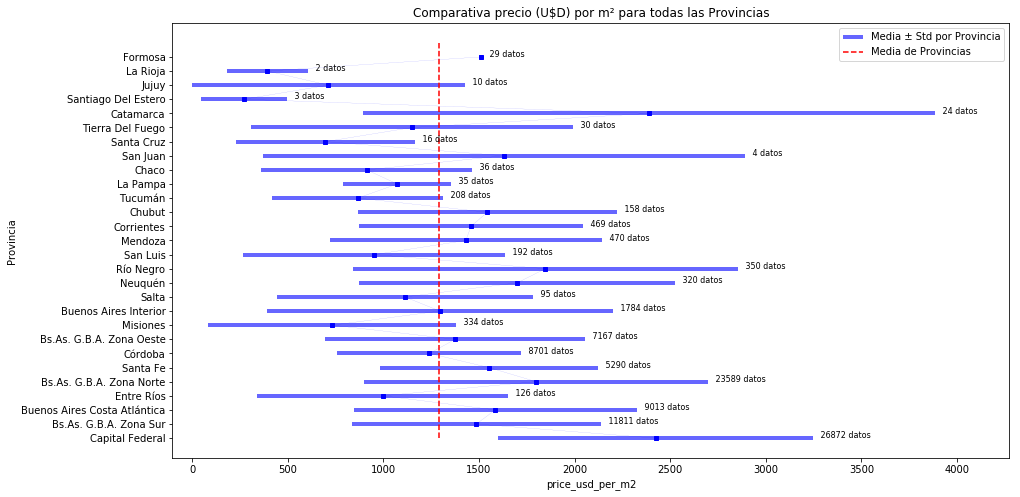

In [6]:
fig = plt.figure(figsize=(15, 8))

y = ics_data.index.values
xmin = ics_data["0"]
xmax = ics_data["1"]

ax = plt.axes(label=y)

ax.hlines(y, xmin, xmax, alpha = 0.6, color = "blue", lw=4, label="Media ± Std por Provincia")
ax.vlines(media_s_1, ics_data.index[0], len(ics_data.index), linestyles="dashed", colors = "red", label="Media de Provincias")

plt.plot(media1, y, 'bs--', linewidth=0.1, markersize=4)

for i in range(len(ics_data.index)):
    if not np.isnan(xmax[i]):     # porque xmax[26] es NaN
        ax.text(xmax[i], i, "   "+str(cant1.iloc[i])+" datos", fontsize=8) 

ax.set_xlim(left=((min(xmin))-100), right=(max(xmax)*1.1))

ax.set_ylabel('Provincia')
ax.set_xlabel('price_usd_per_m2')
ax.set_title('Comparativa precio (U$D) por m² para todas las Provincias')
ax.legend()